<img src="https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg" style="width: 450px;margin-top:30px;" align ="center">

<div style= "font-size: 40px;  margin-top:40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Challenge 2 - Part 1: <strong>Data Preparation</strong></center></div>
<div style= "font-size: 40px; font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center>for cats_and_dogs dataset using neural networks</center></div>

<div style= "font-size: 27px;font-weight:bold;line-height: 1.1; margin-top:40px; font-family: 'Avenir Next LT Pro', sans-serif;"><center>Aprendizagem Profunda para Visão por Computador 2024/2025</center></div> <br>

   <div style= "font-size: 20px;font-weight:bold; font-family: 'Avenir Next LT Pro', sans-serif;"><center> Grupo 7:</center></div>
   <div><center> Diogo Freitas | 104841 </center></div>
   <div><center> João Francisco Botas | 104782 </center></div>
   <div><center> Miguel Gonçalves | 105944 </center></div>
   <div><center> Ricardo Galvão | 105285 </center></div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Objetivo desta parte</a></li>
    <li><a href="#2">Setup para desenvolvimento do projeto</a></li>
    <li><a href="#3">Criação dos conjuntos de validação e teste</a></li>
        <ol>
            <li><a href="#3.1">Visualização dos diferentes conjuntos</a></li>
</ol>

<footer></footer>

</body>
</html>

# <a class='anchor' id='1'></a>

> # **1. Objetivo desta parte** 

1. Carregar dataset
2. Separar validation em validation+test  
3. Ter em conta classificação binária
4. Ter em conta estratificação dos conjuntos de validação e teste

# <a class='anchor' id='2'></a>

> # **2. Setup para desenvolvimento do projeto**

In [10]:
import tensorflow as tf
import keras
from keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import cv2

import seaborn as sns
import sys
import os
from pathlib import Path

In [11]:
# Configurar a seed do TensorFlow
tf.keras.utils.set_random_seed(42)
# Definir a seed global para a operação de GPU
tf.config.experimental.enable_op_determinism()

# Definir o número de threads
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Para evitar log excessivo de TensorFlow
os.environ['OMP_NUM_THREADS'] = '1'  # Para limitar o número de threads

# <a class='anchor' id='3'></a>

> # **3. Criação dos conjuntos de validação e teste**

In [13]:
%run ../src/cats_and_dogs.py

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Using 500 files for training.
Using 500 files for validation.
Train: 2000 samples, 50.00% cats
Validation: 500 samples, 49.40% cats
Test: 500 samples, 50.60% cats


# <a class='anchor' id='3.1.'></a>

> # **3.1. Visualização dos diferentes conjuntos**

In [40]:
# Certificar-se de que os labels são arrays 1D
train_labels = train_labels.flatten()
validation_labels = validation_labels.flatten()
test_labels = test_labels.flatten()

# Contar quantos gatos (label 0) e quantos cães (label 1) existem em cada conjunto
train_cats = np.sum(train_labels == 0)
train_dogs = np.sum(train_labels == 1)
val_cats = np.sum(validation_labels == 0)
val_dogs = np.sum(validation_labels == 1)
test_cats = np.sum(test_labels == 0)
test_dogs = np.sum(test_labels == 1)

# Criar DataFrame
df = pd.DataFrame({
    "Dataset": ["Train", "Train", "Validation", "Validation", "Test", "Test"],
    "Animal": ["Cat", "Dog", "Cat", "Dog", "Cat", "Dog"],
    "Count": [train_cats, train_dogs, val_cats, val_dogs, test_cats, test_dogs]
})

# Calcular percentagens para cada conjunto de dados
df["Total"] = df.groupby("Dataset")["Count"].transform("sum")  # Total de amostras por conjunto
df["Percent"] = (df["Count"] / df["Total"]) * 100  # Percentagem de cada classe

df

,Dataset,Animal,Count,Total,Percent
0,Train,Cat,1000,2000,50.0
1,Train,Dog,1000,2000,50.0
2,Validation,Cat,253,500,50.6
3,Validation,Dog,247,500,49.4
4,Test,Cat,247,500,49.4
5,Test,Dog,253,500,50.6


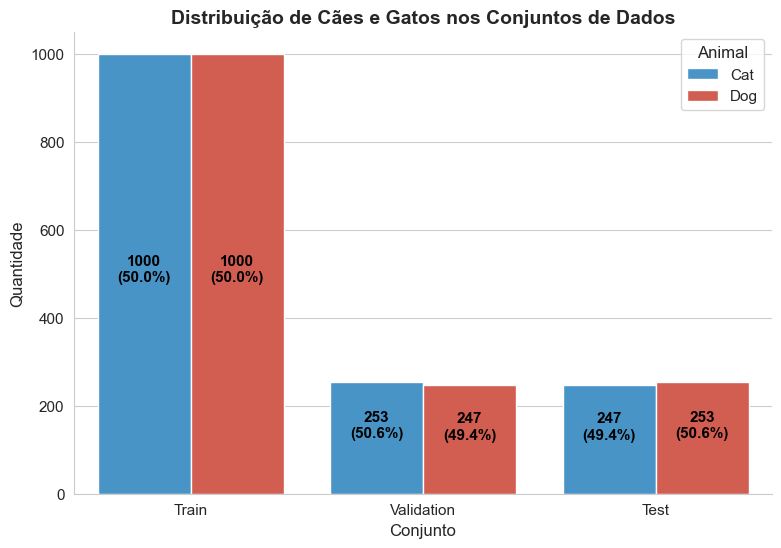

In [86]:
# Criar o gráfico
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x="Dataset", y="Count", hue="Animal", data=df, palette=["#3498db", "#e74c3c"])

# Adicionar valores absolutos e percentuais nas barras
for t, p in enumerate(ax.patches[0:6]):
    # Pega a altura da barra
    height = p.get_height()
    
    # Encontra a posição da barra no eixo x
    x_pos = p.get_x() + p.get_width() / 2  # Posição horizontal central da barra
    
    # Encontra o 'Dataset' e 'Animal' baseado na posição x da barra
    dataset = 'Train' if x_pos < 0.5 else 'Validation' if 0.5 < x_pos < 1.5 else 'Test'
    
    # Obter o animal associado à barra pela cor
    animal = "Cat" if t % 2 == 0 else "Dog"
    if dataset == 'Validation':
        animal = "Cat" if t % 2 == 1 else "Dog" # Por algum motivo estão invertidos, não sei o motivo
    
    # Localizar a linha correspondente no DataFrame
    row = df[(df['Dataset'] == dataset) & (df['Animal'] == animal)].iloc[0]
    value = row['Count']
    percent = row['Percent']
    
    # Inverter o valor para a validação (se necessário)
    if dataset == 'Validation':
        value = row['Count']  # Manter a quantidade
        percent = row['Percent']  # Manter a porcentagem
    
    # Anotar o valor absoluto e percentual no centro da barra
    ax.annotate(f"{int(value)}\n({percent:.1f}%)",
                (x_pos, height/2.1),
                ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='black')

# Melhorar visualização
plt.title("Distribuição de Cães e Gatos nos Conjuntos de Dados", fontsize=14, fontweight='bold')
plt.xlabel("Conjunto", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Animal", title_fontsize=12, fontsize=11)
sns.despine()

# Mostrar o gráfico
plt.show()

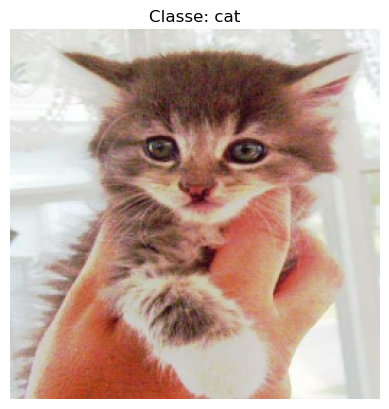

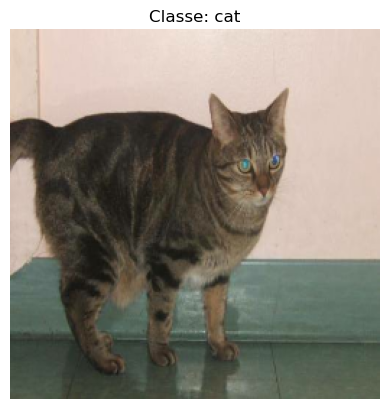

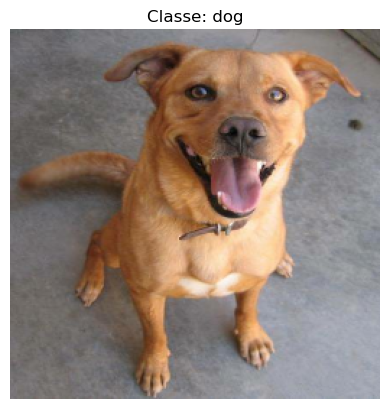

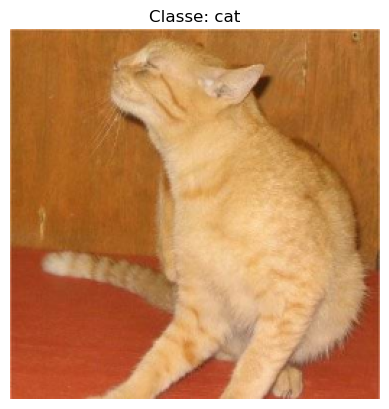

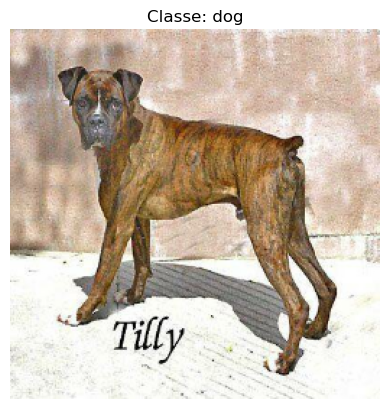

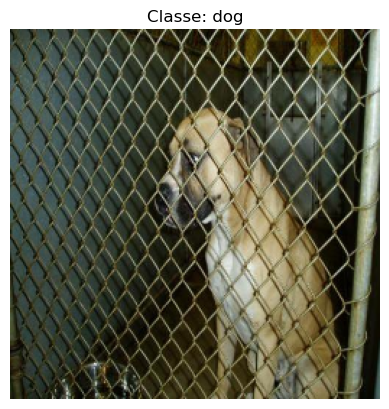

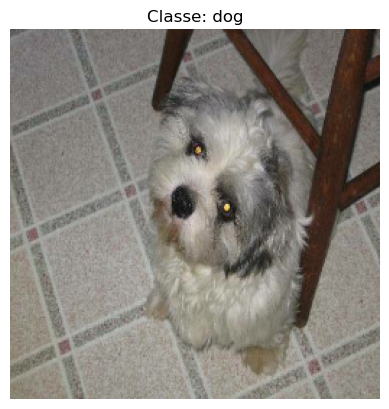

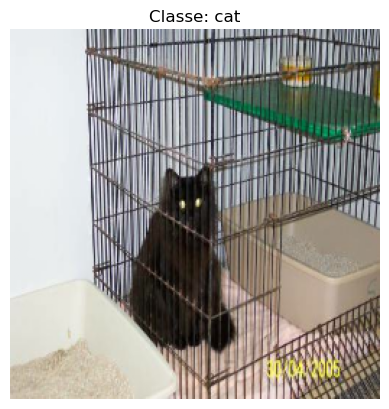

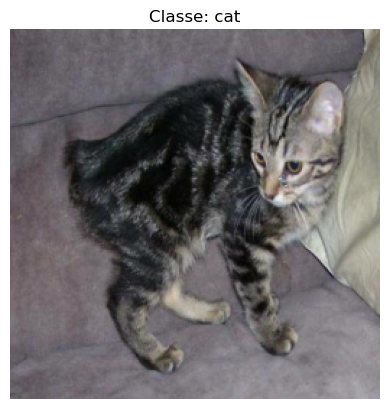

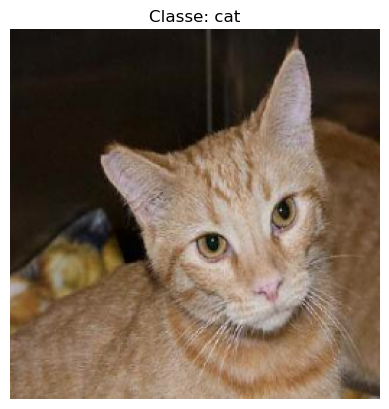

In [9]:
# Mostra umas imagens
for batch_x, batch_y in train:
    for i, x in enumerate(batch_x):
        if i >= 10:
            break
        x = np.asarray(x) / 255
        plt.imshow(x)
        plt.title(f'Classe: {labels[int(batch_y[i])]}')
        plt.axis('off')  # Esconder os eixos
        plt.show()
    break